# Callgraph Decorator Examples

Imports, including the `callgraph` decorator:

In [1]:
from functools import lru_cache
import callgraph.decorator as callgraph

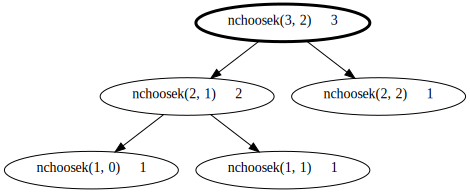

In [2]:
@callgraph
@lru_cache()
def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

nchoosek(3, 2)
nchoosek.__callgraph__

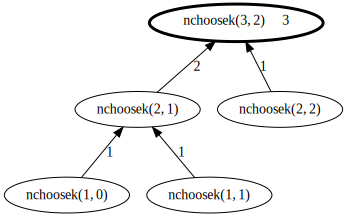

In [5]:
@callgraph(label_returns=True)
@lru_cache()
def nchoosek(n, k):
    if k == 0:
        return 1
    if n == k:
        return 1
    return nchoosek(n - 1, k - 1) + nchoosek(n - 1, k)

nchoosek(3, 2)
nchoosek.__callgraph__